In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

# Softmax Regression

Softmax regression is a generalization of logistic regression to the case where we want to handle multiple classes (k  classes)

**Contents**

- [Softmax Regression](#1.-Softmax-Regression)
- [Example: The Iris Dataset](#2.-Example:-The-Iris-Dataset)
- [Example: The Palmer Archipelago Penguin Dataset](#3.-Example:-The-Palmer-Archipelago-Penguin-Dataset)
- [Example: Oranges, Lemons and Apples dataset](#4.-Example:-Oranges,-Lemons-and-Apples-dataset)

## 1. Softmax Regression

### One-hot encoding

In [38]:
def one_hot_encoding(v):
    # labels
    labels = np.unique(v)
    # ordinal encoding
    dic_labels = {labels[i]:i for i in range(len(labels))}
    ord_labels = np.array([dic_labels[v[i]] for i in range(len(v))])
    # one-hot encoding
    V = np.zeros((len(v),len(labels)))
    V[np.arange(len(v)),ord_labels] = 1
    # return one-hot-encodings and the class labels
    return V,labels

In [39]:
# chekc that it works
y = np.array(['Spain','Italy','Italy','USA','Italy'])
Y, labels = one_hot_encoding(y)
Y

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [40]:
labels

array(['Italy', 'Spain', 'USA'], dtype='<U5')

### The softmax function

In [41]:
def softmax(X,theta):
    m,n = X.shape
    Y = np.exp(X.dot(theta))
    row_sum = np.sum(Y,axis=1).reshape(-1,1)
    return Y/row_sum

In [42]:
# check that it works; notice that the entries of each row add to 1'
X = np.random.randn(5,2) # 5 data points, 2 features
theta = np.random.randn(2,3) # 2 features, 3 classes
P = softmax(X,theta)

In [43]:
P

array([[0.13810677, 0.69595123, 0.165942  ],
       [0.00254054, 0.98941783, 0.00804163],
       [0.69625512, 0.08012625, 0.22361863],
       [0.12630899, 0.64678131, 0.2269097 ],
       [0.39653337, 0.05487088, 0.54859575]])

In [44]:
P.sum(axis=1) # sum along columns (axis=1)

array([1., 1., 1., 1., 1.])

In [45]:
# predict the class with the largest probability
P.argmax(axis=1)

array([1, 1, 0, 1, 2], dtype=int64)

In [46]:
labels[P.argmax(axis=1)]

array(['Spain', 'Spain', 'Italy', 'Spain', 'USA'], dtype='<U5')

### The softmax cost function

In [18]:
def softmax_cost(X,Y,theta):
    m = X.shape[0]
    P = softmax(X,theta)
    return -np.sum(Y*np.log(P))

In [20]:
# check that it works
softmax_cost(X,Y,theta)

12.61326489540915

### Gradient Descent

In [21]:
def softmaxregression_GD(X,y,learning_rate,n_epochs):
    
    # one-hot-encoding function
    def one_hot_encoding(v):
        # labels
        labels = np.unique(v)
        # ordinal encoding
        dic_labels = {labels[i]:i for i in range(len(labels))}
        ord_labels = np.array([dic_labels[v[i]] for i in range(len(v))])
        # one-hot encoding
        V = np.zeros((len(v),len(labels)))
        V[np.arange(len(v)),ord_labels] = 1
        return V,labels
    
    # softmax function
    def softmax(X,theta):
        m,n = X.shape
        Y = np.exp(X.dot(theta))
        row_sum = np.sum(Y,axis=1).reshape(-1,1)
        return Y/row_sum
    
    # softmax cost function
    def softmax_cost(X,Y,theta):
        m = X.shape[0]
        P = softmax(X,theta)
        return -np.sum(Y*np.log(P))
    
    m,n = X.shape
    k = len(np.unique(y))
        
    # initialize vector theta
    theta = np.random.randn(n,k)
    
    # initialize cost vector
    cost = np.zeros(n_epochs)
    
    # one-hot encodings
    Y,labels = one_hot_encoding(y)
    
    # gradient descent iterations  
    for i in range(n_epochs):
        gradient = X.T.dot(softmax(X,theta)-Y)
        theta = theta - learning_rate * gradient
        cost[i] = softmax_cost(X,Y,theta)
            

    return theta,cost,labels

## 2. Example: The Iris Dataset

<img src="iris.png" alt="Drawing" style="width: 700px;"/>

The Iris flower data set is a data set introduced by the British statistician, and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.*

In [22]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
data = pd.read_csv(url)
data.head(5) #first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This dataset consists of 3 different types of irises’ (Setosa, Versicolor, and Virginica) petal and sepal length.

In [23]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
# feature matrix
X = data[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

In [25]:
# target vector
y = data['species'].to_numpy()

In [26]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [27]:
# optional: add bias (the column of all ones) and/or polynomial features
X = build_poly_features(X,degree=1)

In [28]:
# shuffle the data
m = len(y)
permutation = np.random.permutation(m) 
X = X[permutation]
y = y[permutation]

In [29]:
# train-test split (75%-25%)
X_train, y_train = X[0:3*m//4], y[0:3*m//4]
X_test, y_test = X[3*m//4:m], y[3*m//4:m]

In [30]:
theta,cost,labels = softmaxregression_GD(X_train,y_train,
                                         learning_rate = 0.001,
                                         n_epochs=1000)

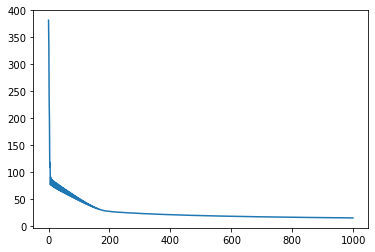

In [31]:
plt.plot(cost)

In [21]:
def softmax_predictor(X,theta,labels):
    P = softmax(X,theta)
    return labels[np.argmax(P,axis=1)]

In [22]:
y_test_pred = softmax_predictor(X_test,theta,labels)
y_test_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [23]:
'Confusion matrix'
def confusion_matrix(y,y_pred,labels):
    C = np.zeros((len(labels),len(labels)))
    for i,label_i in enumerate(labels):
        for j,label_j in enumerate(labels):
            C[i,j]=sum(y_pred[y==label_i]==label_j)
    return C
confusion_matrix(y_test,y_test_pred,labels)

array([[14.,  0.,  0.],
       [ 0., 11.,  2.],
       [ 0.,  1., 10.]])

In [24]:
'percentage of correct classification'
100*np.sum(y_test_pred==y_test)/len(y_test)

92.10526315789474

## 3. Example: The Palmer Archipelago Penguin Dataset

<img src="cute_penguins.png" alt="Drawing" style="width: 500px;"/>

Art by @allison_horst

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

In [25]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


This dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica

In [26]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

The culmen is the upper ridge of a bird’s bill. For this penguin data, the culmen (bill) length and depth are measured as shown below.

<img src="culmen_depth.png" alt="Drawing" style="width: 500px;"/>

Some rows contain missing values. We will drop them from the pandas dataframe.

In [27]:
data.dropna(axis=0,inplace=True)

In [28]:
# target vector
y = data['species'].to_numpy()

In [29]:
# feature matrix
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

In [30]:
# optional: scale the data
X = X/np.abs(X).max(axis=0)

In [31]:
# optional: add bias (the column of all ones and/or polynomial features)
X = build_poly_features(X,degree=1)

In [32]:
# shuffle the data
m = len(y)
permutation = np.random.permutation(m) 
X = X[permutation]
y = y[permutation]

In [33]:
# train-test split (75%-25%)
X_train, y_train = X[0:3*m//4], y[0:3*m//4]
X_test, y_test = X[3*m//4:m], y[3*m//4:m]

In [34]:
theta,cost,labels = softmaxregression_GD(X_train,y_train,
                                        learning_rate = 0.01,
                                        n_epochs=5000,
                                        )

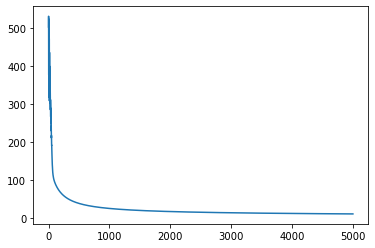

In [35]:
plt.plot(cost)

In [36]:
y_test_pred = softmax_predictor(X_test,theta,labels)

In [37]:
'Confusion matrix'
confusion_matrix(y_test,y_test_pred,labels)

array([[30.,  0.,  0.],
       [ 1., 22.,  0.],
       [ 0.,  0., 31.]])

In [38]:
'percentage of incorrect classification'
100*np.sum(y_test_pred==y_test)/len(y_test)

98.80952380952381

## 4. Example: Oranges, Lemons and Apples dataset

<img src="fruits.png" alt="Drawing" style="width: 500px;"/>

The dataset *fruits.csv* contains measurements of the height (cm), width (cm) and mass (g) of a selection of oranges, lemons and apples.

In [39]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fruits.csv'
data = pd.read_csv(url)
data

,fruit,height,width,mass,description
0,apple,192,8.4,7.3,Granny smith apple
1,apple,180,8.0,6.8,Granny smith apple
2,apple,176,7.4,7.2,Granny smith apple
3,orange,86,6.2,4.7,Mandarin
4,orange,84,6.0,4.6,Mandarin
5,orange,80,5.8,4.3,Mandarin
6,orange,80,5.9,4.3,Mandarin
7,orange,76,5.8,4.0,Mandarin
8,apple,178,7.1,7.8,Braeburn apple
9,apple,172,7.4,7.0,Braeburn apple


In [40]:
X = data[['height', 'width', 'mass']].to_numpy()

In [41]:
# scale the data
X = X/X.max(axis=0)

In [42]:
y =  data['fruit'].to_numpy()

In [43]:
y

array(['apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange',
       'orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'lemon', 'lemon', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon'], dtype=object)

In [44]:
theta,cost,labels = softmaxregression_GD(X,y,
                               learning_rate = 0.01,
                               n_epochs=5000,)

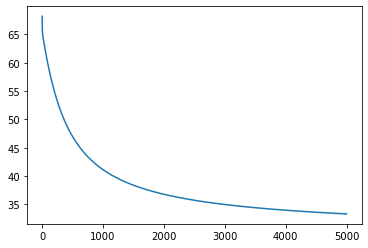

In [45]:
plt.plot(cost)

In [47]:
y_pred = softmax_predictor(X,theta,labels)

In [48]:
'Confusion matrix'
confusion_matrix(y,y_pred,labels)

array([[ 0.,  0., 19.],
       [ 0., 16.,  0.],
       [ 5.,  0., 19.]])

In [49]:
'percentage of incorrect classification'
100*np.sum(y_pred==y)/len(y)

59.32203389830509

## 5. Three spirals dataset

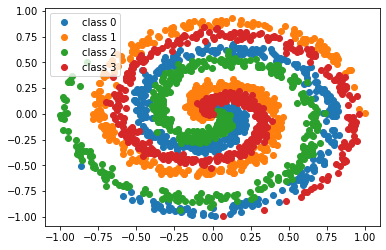

In [62]:
classes = 4
n_points = 500
noise = 0.3
radius = 10

X = np.zeros((n_points*classes, 2))
y = np.zeros(n_points*classes).astype('int')

for class_number in range(classes):
    ix = range(n_points*class_number, n_points*(class_number+1))
    r = np.linspace(0,1, n_points)
    t = np.linspace(class_number*radius, (class_number+1)*radius, n_points) + np.random.randn(n_points)*noise
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = class_number
    
    
for i in range(classes):
    plt.plot(X[y==i,0],X[y==i,1],'o',label = 'class '+str(i))
plt.legend()

In [63]:
X_poly = build_poly_features(X,degree=10)
X_poly.shape

(2000, 66)

In [64]:
theta,cost,labels = softmaxregression_GD(X_poly,y,
                                        learning_rate = 0.001,
                                        n_epochs=20000,
                                        )

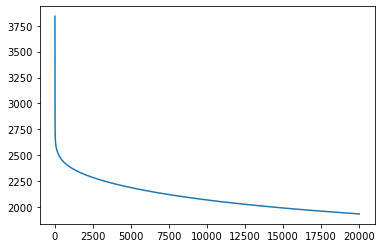

In [65]:
plt.plot(cost)

In [66]:
def plot_softmax_regions(X, y, theta, labels, degree=1):
    from matplotlib.colors import ListedColormap
    
    # softmax predictor function
    def predictor_softmax(X,theta,labels):
        P = softmax(X,theta)
        return labels[np.argmax(P,axis=1)]
    
    # create a 500x500 meshgrid
    m_plot = 500
    x1 = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, m_plot)
    x2 = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5, m_plot)
    X1, X2 = np.meshgrid(x1, x2) 
    X_plot = np.c_[X1.ravel(), X2.ravel()]
    
    # add polynomial features
    X_plot_poly = build_poly_features(X_plot,degree=degree)

    # evaluate the softmax regression model at each point of the mesh grid    
    y_plot = predictor_softmax(X_plot_poly,theta,labels).reshape(X1.shape)        


    # custom color map
    k = len(labels)
    custom_cmap = ListedColormap(['C'+str(i) for i in range(k)])
    
    # softmax classification regions
    plt.figure(figsize=(12,5))
    plt.contourf(X1, X2, y_plot, alpha=0.3, cmap=custom_cmap)
    
    # plot data points
    for label in labels:
        plt.scatter(X[y==label,0],X[y==label,1], label=label)
        
    plt.legend(fontsize=15)

<ipython-input-6-a1db6d64dd14>:3: RuntimeWarning: overflow encountered in exp
  Y = np.exp(X.dot(theta))
<ipython-input-6-a1db6d64dd14>:5: RuntimeWarning: invalid value encountered in true_divide
  return Y/row_sum


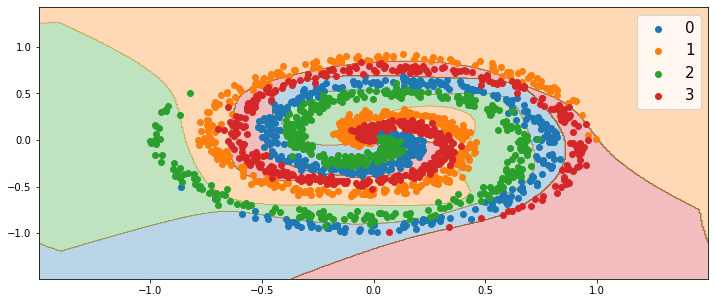

In [67]:
plot_softmax_regions(X, y, theta, labels, degree=10)